In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("avocado.csv")
df = data

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
y = df["type"]
y.head()

0    conventional
1    conventional
2    conventional
3    conventional
4    conventional
Name: type, dtype: object

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
X = df.drop(columns=["type","Date","Unnamed: 0"])
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


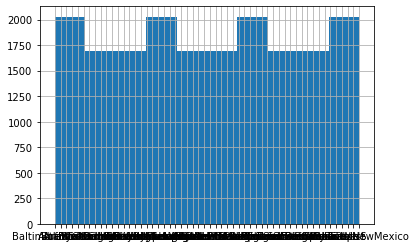

In [8]:
X["region"].hist()
le.fit(X["region"])
X["region"] = le.transform(X["region"])

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(hidden_layer_sizes=(23), random_state=1)
clf.fit(X,y)
score_nn = cross_val_score(clf, X, y, cv=5)
score_nn

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

array([0.94494659, 0.93643836, 0.96958904, 0.94491642, 0.9408057 ])

In [12]:
print(f'{np.mean(score_nn)} {np.std(score_nn)}\n{np.mean(score_nn)-np.std(score_nn)} {np.mean(score_nn)+np.std(score_nn)}')

0.9473392205767492 0.0115599732918149
0.9357792472849343 0.9588991938685641


In [13]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X,y)
score_tree = cross_val_score(clf_tree, X, y, cv=5)
score_tree

array([0.97480142, 0.98082192, 0.97479452, 0.96601809, 0.96300356])

In [14]:
print(f'{np.mean(score_tree)} {np.std(score_tree)}\n{np.mean(score_tree)-np.std(score_tree)} {np.mean(score_tree)+np.std(score_tree)}')

0.9718879024781095 0.006482898957633202
0.9654050035204763 0.9783708014357427


In [15]:
feature_names = []
for col in X.columns:
    feature_names.append(str(col)) 

In [16]:
type(clf_tree.classes_)

numpy.ndarray

In [18]:
import graphviz 
import sklearn.tree as tree
import pylab
dot_data = tree.export_graphviz(clf_tree, out_file=None, filled=True, rounded=True, 
                feature_names=feature_names, class_names=['0','1'], )  
graph = graphviz.Source(dot_data)  
graph
graph.render('dicision_tree.gv', view=True)  

'dicision_tree.gv.pdf'